
COGS 108 Final Project
Optimal Bus Stop Locations

Question:

Hypothesis:


In [1]:
# Import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
from geopy.geocoders import Nominatim
from geopy.distance import vincenty


In [2]:
meter_incomes = pd.read_csv('treas_meters_2016_pole_by_month_datasd.csv')

In [3]:
meter_incomes.head(5)

,pole_id,meter_type,month,sum_trans_amt,num_trans
0,1-1004,SS,1,18701,182
1,1-1004,SS,2,16869,193
2,1-1004,SS,3,19283,198
3,1-1004,SS,4,17912,185
4,1-1004,SS,5,19425,244


In [4]:
meter_locs = pd.read_csv('treas_parking_meters_loc_datasd.csv')

In [5]:
meter_locs.head(5)

,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
0,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352
2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155
3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1013,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145405,32.700107
4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1015,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145539,32.699987


In [6]:
# Sort the income column of the parking meter dataframe in descending order
meter_trans = meter_incomes.sort_values(by='num_trans', ascending=False)
meter_trans.head(5)

,pole_id,meter_type,month,sum_trans_amt,num_trans
52734,WFI-700N,MS,12,386404,2293
51824,WBE-500N,MS,8,392316,2286
51821,WBE-500N,MS,5,381115,2284
41888,N-1500E,MS,8,364944,2270
51822,WBE-500N,MS,6,381115,2261


In [7]:
greatest = meter_trans.iloc[0]['pole_id']
print(greatest)
type(greatest)

WFI-700N


str

In [8]:
location = meter_locs.loc[meter_locs['pole'] == greatest]
print(location)

          zone          area         sub_area      pole  config_id  \
2632  Downtown  Little Italy  700 WEST FIR ST  WFI-700N      13180   

                                   config_name   longitude   latitude  
2632  MSPM 2 Hour Max $1.25 HR 8am-6pm Mon-Sat -117.169649  32.724648  


In [9]:
parking_lng = float(location['longitude'])
parking_lat = float(location['latitude'])

parking_pair = (parking_lat,parking_lng)

In [10]:
reverse = Geocoder.reverse_geocode(parking_lat,parking_lng)
print(reverse)

1950 Kettner Blvd, San Diego, CA 92101, USA


In [11]:
bus_locs = pd.read_csv('Bus_stops.csv')
bus_locs.head(5)

,intersection_code,stop_lat,wheelchair_boarding,zone_id,stop_lon,stop_id,stop_name_short,parent_station,stop_name,reference_place,location_type,stop_place,stop_code
0,N-W/B,32.576640,1.0,NaN,-117.109169,60140,Imperial Bch&Florida,NaN,Imperial Beach Bl & Florida St,NaN,0,NaN,60140.0
1,F-W/B,32.615403,2.0,NaN,-117.063182,30180,Naples&Alpine,NaN,Naples St & Alpine Av,NaN,0,NaN,30180.0
2,N-W/B,32.743484,2.0,NaN,-117.181207,13356,Wshngtn&India,NaN,Washington St & India St,NaN,0,NaN,13356.0
3,N-S/B,32.798164,1.0,NaN,-117.240431,11543,Ingraham&Grand,NaN,Ingraham St & Grand Av,NaN,0,inggra,11543.0
4,N-S/B,32.710596,0.0,NaN,-117.238380,11546,Rosecrans&McCall,NaN,Rosecrans St & McCall St,NaN,0,NaN,11546.0


In [12]:
bus_coords = bus_locs[['stop_lat', 'stop_lon']]
distances = []
for i in range(1, len(bus_coords)):
    bus_lat = float(bus_coords['stop_lat'].iloc[i])
    bus_lng = float(bus_coords['stop_lon'].iloc[i])

    bus_pair = (bus_lat,bus_lng)
    distances.append(vincenty(parking_pair,bus_pair).feet)
distances.sort()

print(distances[0])


105.8936722842296


In [13]:
traffic_counts = pd.read_csv('Traffic_Counts.csv')
traffic_counts.head(5)

,id,street_name,limits,all_count,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,count_date
0,NHARBORDR049004,N HARBOR DR,LAUREL ST - COAST GUARD GT,,NaN,NaN,49070.0,50130.0,99200,0490-04,6/24/04 0:00
1,FAIRMOUNTAV029102,FAIRMOUNT AV,MONTEZUMA RD - CAMINO DEL RIOS,,46460,52190.0,NaN,NaN,98650,0291-02,3/12/02 0:00
2,FAIRMOUNTAV046602,FAIRMOUNT AV,CAMINO DEL RIO S - SD 008,,51180,41470.0,NaN,NaN,92650,0466-02,5/2/02 0:00
3,NHARBORDR039909,N HARBOR DR,WINSHIP LN - STILLWATER RD,,NaN,NaN,42510.0,46580.0,89090,0399-09,6/18/09 0:00
4,NHARBORDR033407,N HARBOR DR,LAUREL ST - COAST GUARD GT,,NaN,NaN,43510.0,44530.0,88040,0334-07,6/27/07 0:00


In [14]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2, whiten

Length of bus_coords dataframe:  4636
Centroids:  [[ 298.82506569 -911.19295469]
 [ 300.20532662 -910.46841298]
 [ 300.99353774 -906.922079  ]
 [ 299.94776223 -911.97218482]
 [ 301.58275413 -911.57281026]]


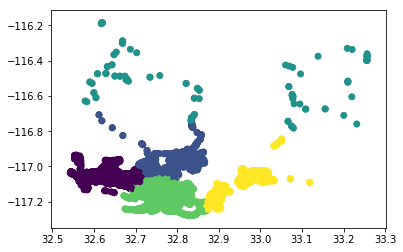

In [15]:
# 1. BUS VS. METER HOTSPOTS
# K-means clustering of hottest parking meters
# Determine whether bus and meter clusters have similar epicenters

# First cluster bus stop coordinates.
coords = np.zeros(len(bus_coords), dtype=('2float'))

for i in range(0, len(bus_coords)):
    bus_lat = float(bus_coords['stop_lat'].iloc[i])
    bus_lng = float(bus_coords['stop_lon'].iloc[i])
    coords[i] = (bus_lat, bus_lng)

print("Length of bus_coords dataframe: ",len(coords))

x, y = kmeans2(whiten(coords), 5, iter = 20)  
print("Centroids: ",x)

plt.scatter(coords[:,0], coords[:,1], c=y);
plt.show()




Outlier:  Empty DataFrame
Columns: [latitude, longitude]
Index: []
Length of meter_coords dataframe:  4667
Centroids:  [[ 1208.95051954 -9289.32999949]
 [ 1209.4874916  -9281.07700198]
 [ 1185.3817122  -9270.61431954]
 [ 1208.87348645 -9283.63451719]
 [ 1208.11711497 -9283.14704105]]


/Users/sarahgeorge/anaconda/envs/py36/lib/python3.6/site-packages/scipy/cluster/vq.py:653: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


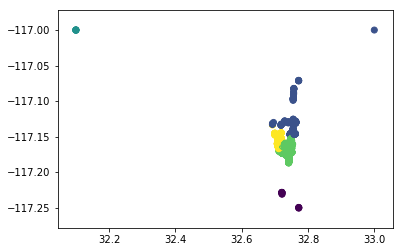

In [16]:
# Second, cluster parking meter coordinates.
meter_coords = meter_locs[['latitude', 'longitude']]

# Drop rows with invalid data, such as all zero coordinate rows
meter_coords = meter_coords[(meter_coords.T != 0).any()]

# Limit range so that any outliers or typos in data are eliminated
meter_coords = meter_coords.drop(meter_coords[meter_coords['longitude'] < -120].index)
print("Outlier: ",meter_coords.loc[meter_coords['longitude'] < -120])

# Initialize a nparray to store coordinate pairs
coords2 = np.zeros(len(meter_coords), dtype=('2float'))

# Iterate through meter coordinates dataframe and add pairs to nparray
for i in range(0, len(meter_coords)):
    meter_lat = float(meter_coords['latitude'].iloc[i])
    meter_lng = float(meter_coords['longitude'].iloc[i])
    coords2[i] = (meter_lat, meter_lng)

print("Length of meter_coords dataframe: ",len(coords2))

# Kmeans clustering of coordinate pairs, with 4 clusters
x, y = kmeans2(whiten(coords2), 5, iter = 20)  
print("Centroids: ",x)

# Plot a scatterplot with kmeans generated clusters
plt.scatter(coords2[:,0], coords2[:,1], c=y);
plt.show()



In [17]:
# 2. METER LOCATIONS VS. BUS LOCATIONS REGRESSION
# Linear Regression to determine if cluster centers of high transaction meters are correlated
# with central bus stop locations.

from sklearn.decomposition import PCA
# Initialize the PCA model, here specifying 1 component
pca = PCA(n_components=1, whiten=True)
# Fit the PCA model, and apply it to transform the data
out = pca.fit_transform(x)
plt.plot(out, '.')

In [18]:
## Direction of Traffic
# Less buses from northern San Diego

traffic_counts.sum(traffic_counts['northbound_count'])

NameError: name 'northbound_count' is not defined

In [19]:
# 3. TRAFFIC COUNTS & METER CLUSTERING
# within clusters of meters, find average transaction amount over total num meters
# Also collect traffic counts within cluster.